In [1]:
import tensorflow as tf
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

C:\Users\SONY\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\SONY\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\SONY\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\SONY\AppData\Roaming\Python\Python36\site-pack

In [10]:
import math

def get_y(x):
    return (10 + x*x*x) 


def sample_data(n=10000, scale=100):
    data = []

    x = scale*(np.random.random_sample((n,))-0.5)

    for i in range(n):
        yi = get_y(x[i])
        data.append([x[i], yi])

    return np.array(data)

In [3]:
def sample_Z(m, n):
    return np.random.uniform(-1., 1., size=[m, n])

def generator(Z,hsize=[16, 16],reuse=False):
    with tf.variable_scope("GAN/Generator",reuse=reuse):
        h1 = tf.layers.dense(Z,hsize[0],activation=tf.nn.leaky_relu)
        h2 = tf.layers.dense(h1,hsize[1],activation=tf.nn.leaky_relu)
        out = tf.layers.dense(h2,2)

    return out

def discriminator(X,hsize=[16, 16],reuse=False):
    with tf.variable_scope("GAN/Discriminator",reuse=reuse):
        h1 = tf.layers.dense(X,hsize[0],activation=tf.nn.leaky_relu)
        h2 = tf.layers.dense(h1,hsize[1],activation=tf.nn.leaky_relu)
        h3 = tf.layers.dense(h2,2)
        out = tf.layers.dense(h3,1)

    return out, h3

In [4]:
X = tf.placeholder(tf.float32,[None,2])
Z = tf.placeholder(tf.float32,[None,2])

G_sample = generator(Z)
r_logits, r_rep = discriminator(X)
f_logits, g_rep = discriminator(G_sample,reuse=True)

disc_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=r_logits,labels=tf.ones_like(r_logits)) + tf.nn.sigmoid_cross_entropy_with_logits(logits=f_logits,labels=tf.zeros_like(f_logits)))
gen_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=f_logits,labels=tf.ones_like(f_logits)))

gen_vars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES,scope="GAN/Generator")
disc_vars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES,scope="GAN/Discriminator")

gen_step = tf.train.RMSPropOptimizer(learning_rate=0.001).minimize(gen_loss,var_list = gen_vars) # G Train step
disc_step = tf.train.RMSPropOptimizer(learning_rate=0.001).minimize(disc_loss,var_list = disc_vars) # D Train step


Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Iterations: 0	 Discriminator loss: 0.7284	 Generator loss: 0.6931


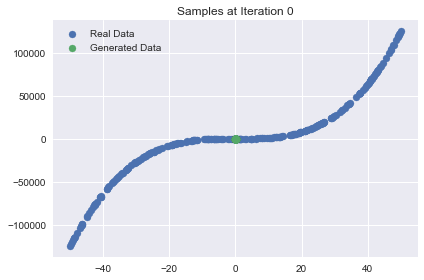

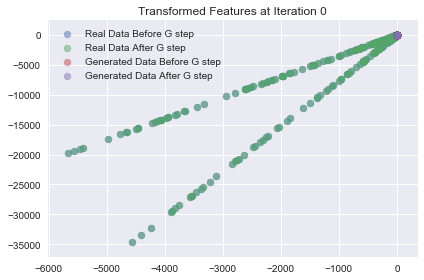

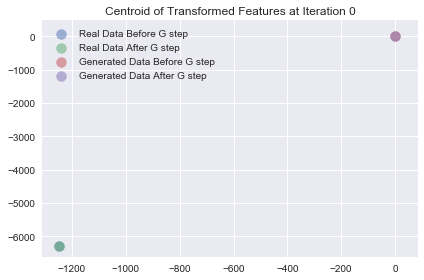

Iterations: 500	 Discriminator loss: 9.7976	 Generator loss: 12.3847
Iterations: 1000	 Discriminator loss: 3.6554	 Generator loss: 3.9535


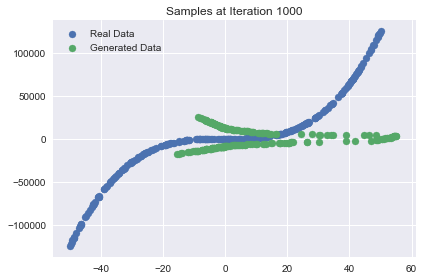

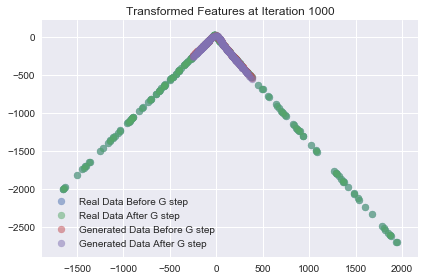

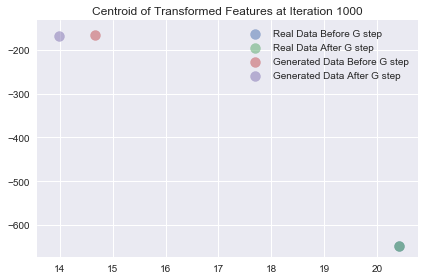

Iterations: 1500	 Discriminator loss: 1.3350	 Generator loss: 0.7058
Iterations: 2000	 Discriminator loss: 1.3714	 Generator loss: 0.6713


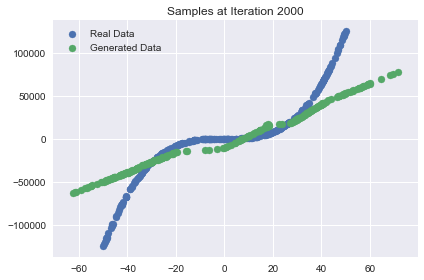

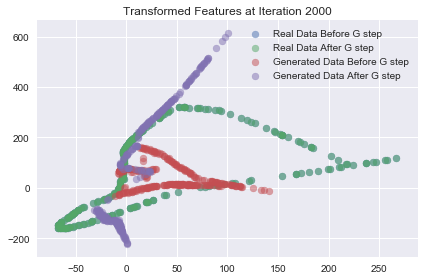

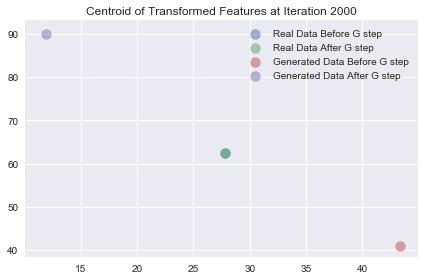

Iterations: 2500	 Discriminator loss: 1.0573	 Generator loss: 0.1087
Iterations: 3000	 Discriminator loss: 1.1625	 Generator loss: 0.6870


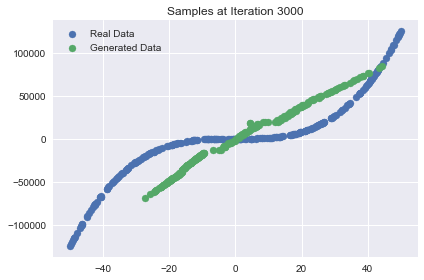

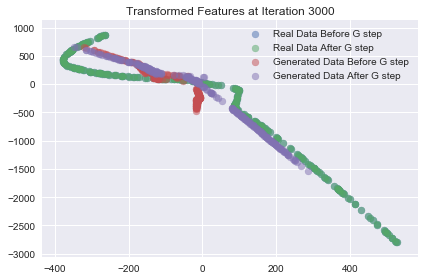

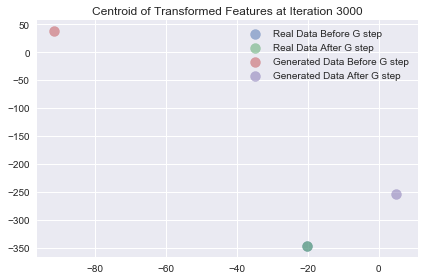

Iterations: 3500	 Discriminator loss: 1.3949	 Generator loss: 0.2880
Iterations: 4000	 Discriminator loss: 1.0849	 Generator loss: 0.1877


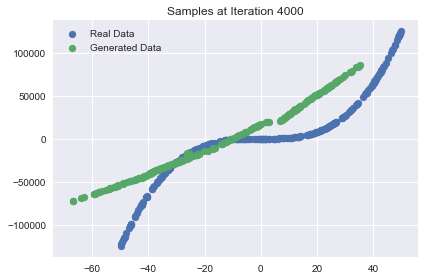

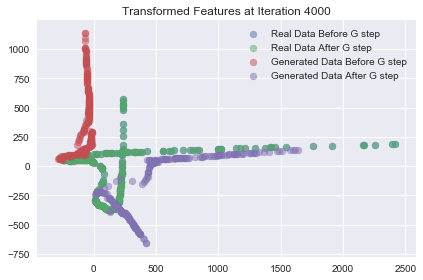

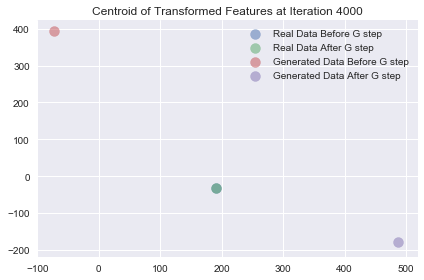

Iterations: 4500	 Discriminator loss: 1.1208	 Generator loss: 0.3150
Iterations: 5000	 Discriminator loss: 1.0693	 Generator loss: 0.1227


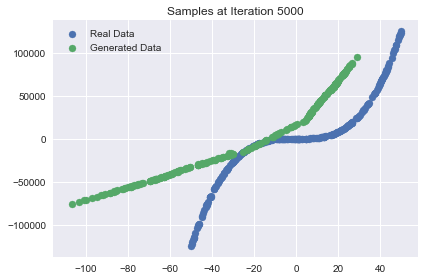

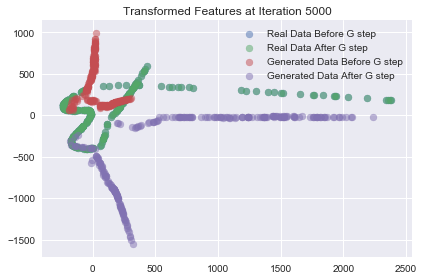

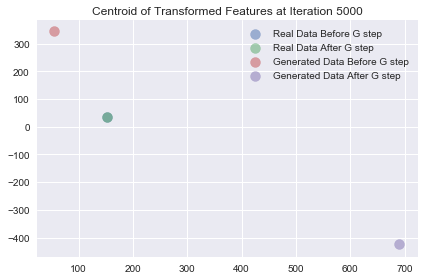

Iterations: 5500	 Discriminator loss: 0.9998	 Generator loss: 0.0929
Iterations: 6000	 Discriminator loss: 1.3576	 Generator loss: 0.3421


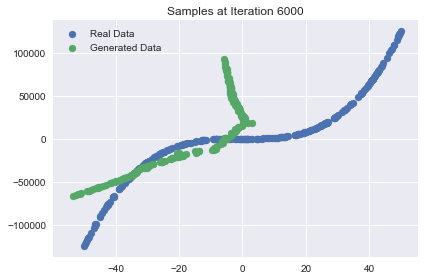

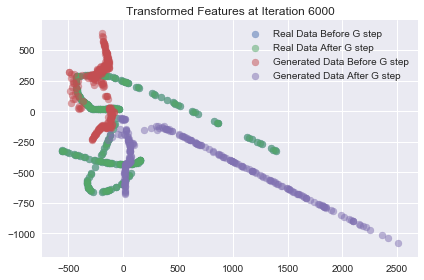

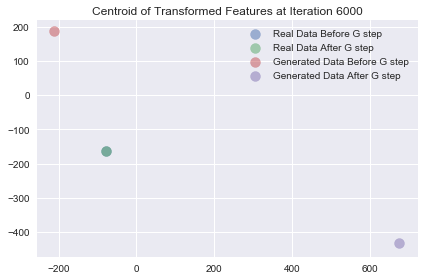

Iterations: 6500	 Discriminator loss: 0.9111	 Generator loss: 0.1441
Iterations: 7000	 Discriminator loss: 0.7338	 Generator loss: 0.0923


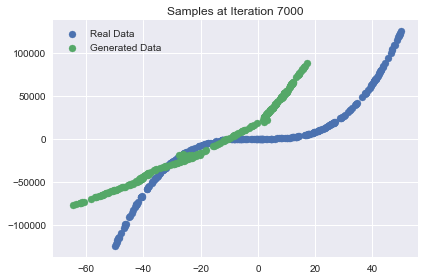

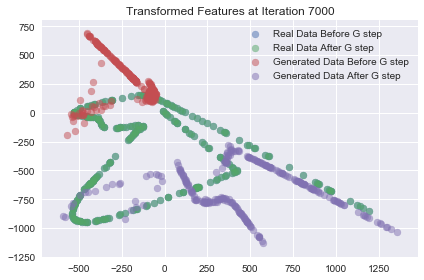

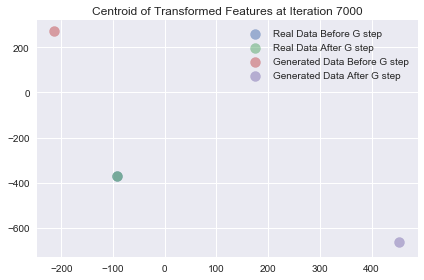

Iterations: 7500	 Discriminator loss: 1.3800	 Generator loss: 0.2183
Iterations: 8000	 Discriminator loss: 1.3183	 Generator loss: 0.4231


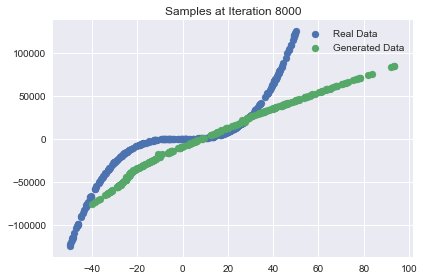

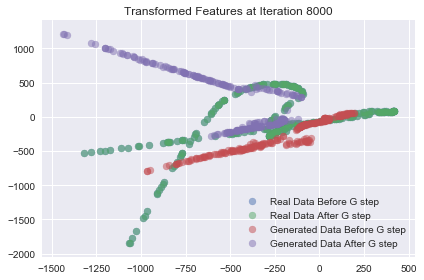

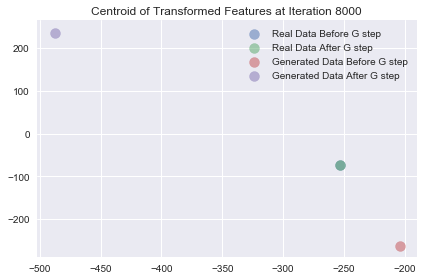

Iterations: 8500	 Discriminator loss: 1.0035	 Generator loss: 0.1538
Iterations: 9000	 Discriminator loss: 0.9644	 Generator loss: 0.1117


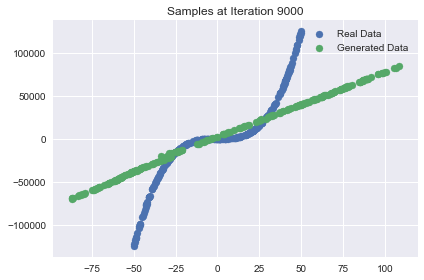

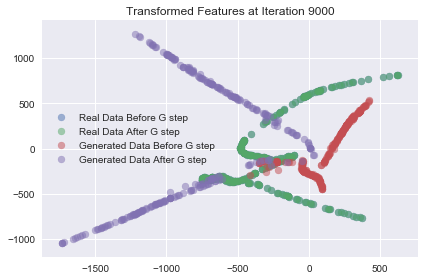

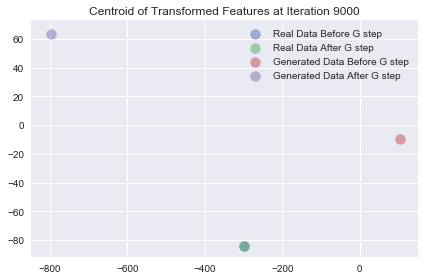

Iterations: 9500	 Discriminator loss: 0.6904	 Generator loss: 0.1504
Iterations: 10000	 Discriminator loss: 1.2013	 Generator loss: 0.3148


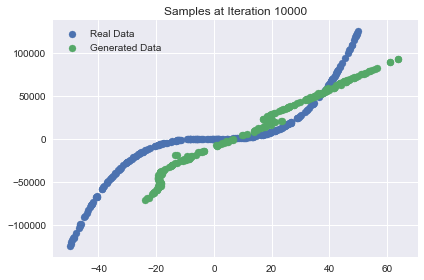

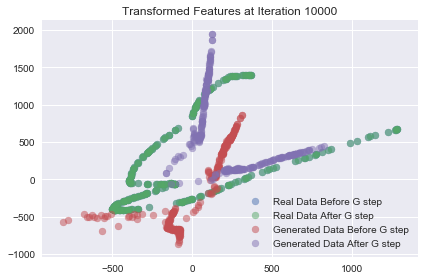

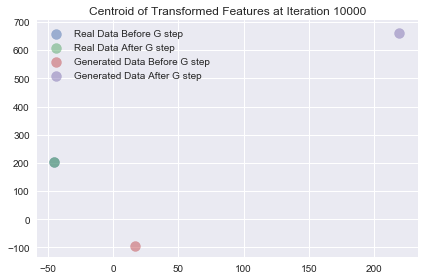

In [11]:
sess = tf.Session()
tf.global_variables_initializer().run(session=sess)

batch_size = 256
nd_steps = 10
ng_steps = 10

x_plot = sample_data(n=batch_size)

f = open('loss_logs.csv','w')
#f.write('Iteration,Discriminator Loss,Generator Loss\n')

for i in range(10001):
    X_batch = sample_data(n=batch_size)
    Z_batch = sample_Z(batch_size, 2)

    for _ in range(nd_steps):
        _, dloss = sess.run([disc_step, disc_loss], feed_dict={X: X_batch, Z: Z_batch})
    rrep_dstep, grep_dstep = sess.run([r_rep, g_rep], feed_dict={X: X_batch, Z: Z_batch})

    for _ in range(ng_steps):
        _, gloss = sess.run([gen_step, gen_loss], feed_dict={Z: Z_batch})

    rrep_gstep, grep_gstep = sess.run([r_rep, g_rep], feed_dict={X: X_batch, Z: Z_batch})

    if i%500 == 0:
        print("Iterations: %d\t Discriminator loss: %.4f\t Generator loss: %.4f" %(i,dloss,gloss))
        
    if i%10 == 0:
        f.write("%d,%f,%f\n"%(i,dloss,gloss))

    if i%1000 == 0:
        plt.figure()
        g_plot = sess.run(G_sample, feed_dict={Z: Z_batch})
        xax = plt.scatter(x_plot[:,0], x_plot[:,1])
        gax = plt.scatter(g_plot[:,0],g_plot[:,1])

        plt.legend((xax,gax), ("Real Data","Generated Data"))
        plt.title('Samples at Iteration %d'%i)
        plt.tight_layout()
        #plt.savefig('iteration_%d.png'%i)
        plt.show()
        plt.close()

        plt.figure()
        rrd = plt.scatter(rrep_dstep[:,0], rrep_dstep[:,1], alpha=0.5)
        rrg = plt.scatter(rrep_gstep[:,0], rrep_gstep[:,1], alpha=0.5)
        grd = plt.scatter(grep_dstep[:,0], grep_dstep[:,1], alpha=0.5)
        grg = plt.scatter(grep_gstep[:,0], grep_gstep[:,1], alpha=0.5)


        plt.legend((rrd, rrg, grd, grg), ("Real Data Before G step","Real Data After G step",
                               "Generated Data Before G step","Generated Data After G step"))
        plt.title('Transformed Features at Iteration %d'%i)
        plt.tight_layout()
        #plt.savefig('feature_transform_%d.png'%i)
        plt.show()
        plt.close()

        plt.figure()

        rrdc = plt.scatter(np.mean(rrep_dstep[:,0]), np.mean(rrep_dstep[:,1]),s=100, alpha=0.5)
        rrgc = plt.scatter(np.mean(rrep_gstep[:,0]), np.mean(rrep_gstep[:,1]),s=100, alpha=0.5)
        grdc = plt.scatter(np.mean(grep_dstep[:,0]), np.mean(grep_dstep[:,1]),s=100, alpha=0.5)
        grgc = plt.scatter(np.mean(grep_gstep[:,0]), np.mean(grep_gstep[:,1]),s=100, alpha=0.5)

        plt.legend((rrdc, rrgc, grdc, grgc), ("Real Data Before G step","Real Data After G step",
                               "Generated Data Before G step","Generated Data After G step"))

        plt.title('Centroid of Transformed Features at Iteration %d'%i)
        plt.tight_layout()
        #plt.savefig('feature_transform_centroid_%d.png'%i)
        plt.show()
        plt.close()

f.close()

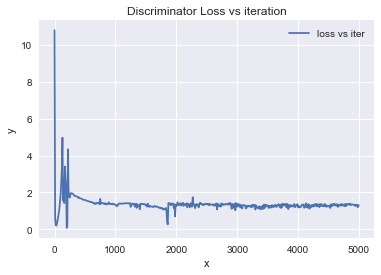

In [29]:
import csv
x=[]
y=[]
with open('loss_logs.csv','r') as csvfile:
    plots = csv.reader(csvfile)
    for row in plots:
        x.append(float(row[0]))
        y.append(float(row[1]))

plt.plot(x,y, label='loss vs iter')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Discriminator Loss vs iteration')
plt.legend()
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

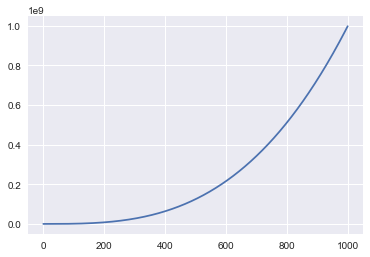

In [61]:
x1=[]
y1=[]
for i in range(1000):
    x1.append(i)
    y1.append(10 + (i*i*i))
plt.plot(x1,y1)
plt.show